In [305]:
import pandas as pd
import geopandas as gpd
from geopandas.tools import geocode
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import re

# Read in csv file as df
job_df = pd.read_csv('Lightcast_UK_Postings_Sample.csv')



c:\Users\kebl5409\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


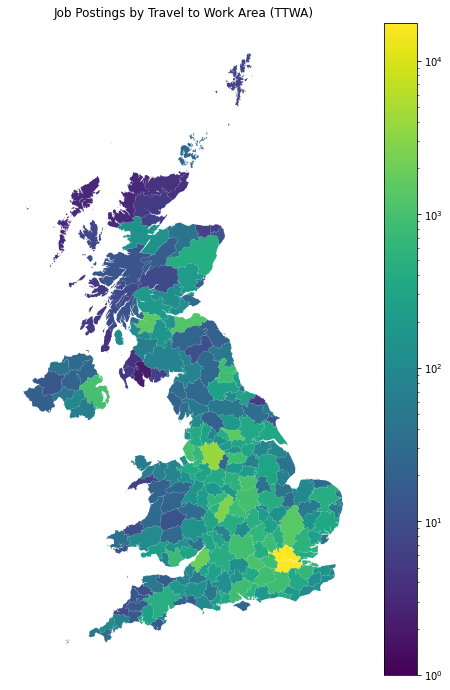

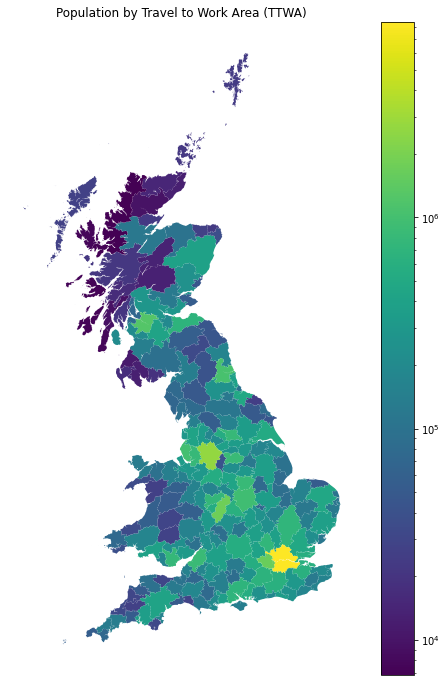

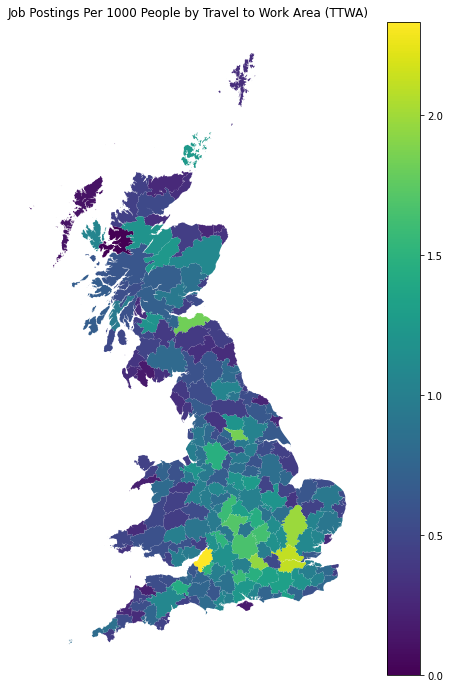

In [310]:
# Read in Excel file with ONS data
TTWA_data = pd.read_excel('TTWA_data.xls', 1, skiprows=1)

# Read in TTWA shapefile data (from ONS)
UK_TTWA_map = gpd.read_file('Shapefiles/Travel_to_Work_Areas_(Dec_2011)_SGCB_in_United_Kingdom.shp')
# Make a new seris in map geodataframe containing number of job postings for each TTWA
UK_TTWA_map['num_jobs'] = [sum(job_df.TTWA_NAME == area) for area in UK_TTWA_map.TTWA11NM]

# Make fig and ax objects for plotting
fig, ax1 = plt.subplots()
fig.set_size_inches(9, 12)  # Set size
ax1.axis('off')             # Turn off axes
ax1.set_title('Job Postings by Travel to Work Area (TTWA)')

# Plot map, coloured by number of jobs, with log scale
p = UK_TTWA_map.plot(ax = ax1, cmap='viridis', column = 'num_jobs', legend = True, norm=matplotlib.colors.LogNorm(vmin=1, vmax=max(UK_TTWA_map['num_jobs'])))

# Rename TTWA variable from Excel dataset so that
TTWA_data.rename(columns={'TTWA11NMN': 'TTWA11NM'}, inplace=True)

# Merge data from ONS dataet into geodataframe
UK_TTWA_map = UK_TTWA_map.merge(TTWA_data, how='left', on='TTWA11NM')

# Make fig and ax objects for plotting
fig2, ax2 = plt.subplots()
fig2.set_size_inches(9, 12)
ax2.axis('off')
ax2.set_title('Population by Travel to Work Area (TTWA)')

# Plot map, coloured by number of jobs, with log scale
p2 = UK_TTWA_map.plot(ax = ax2, cmap='viridis', column = 'Population', legend = True, norm=matplotlib.colors.LogNorm(vmin=min(UK_TTWA_map['Population']), vmax=max(UK_TTWA_map['Population'])))

# Calculate jobs postins per capita
UK_TTWA_map['JobsPerCapita']=UK_TTWA_map['num_jobs']/(UK_TTWA_map['Population']/1000)

# Make fig and ax objects for plotting
fig3, ax3 = plt.subplots()
fig3.set_size_inches(9, 12)
ax3.axis('off')
ax3.set_title('Job Postings Per 1000 People by Travel to Work Area (TTWA)')

# Plot map, coloured by number of jobs, with log scale
p3 = UK_TTWA_map.plot(ax = ax3, cmap='viridis', column = 'JobsPerCapita', legend = True, ) #norm=matplotlib.colors.LogNorm(vmin=np.sort(UK_TTWA_map['JobsPerCapita'])[1], vmax=max(UK_TTWA_map['JobsPerCapita']))


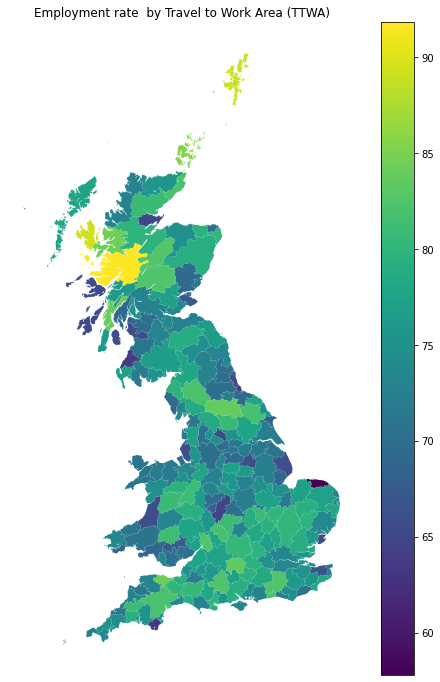

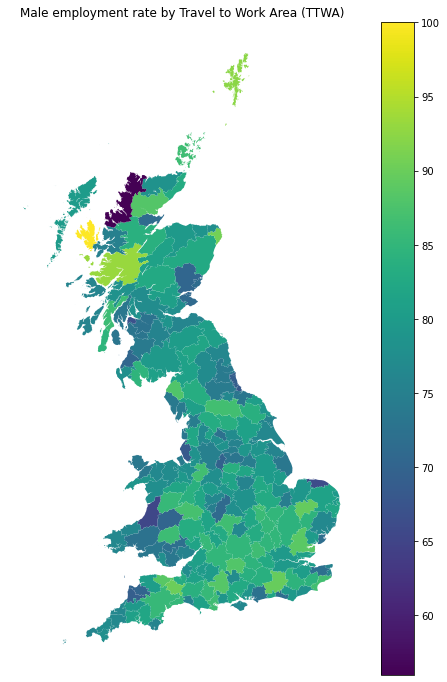

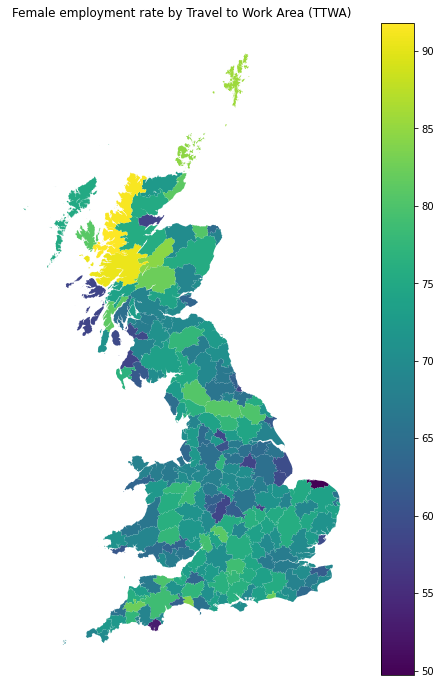

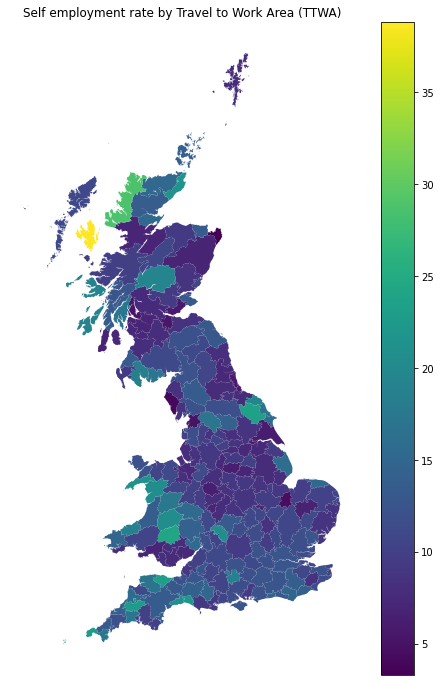

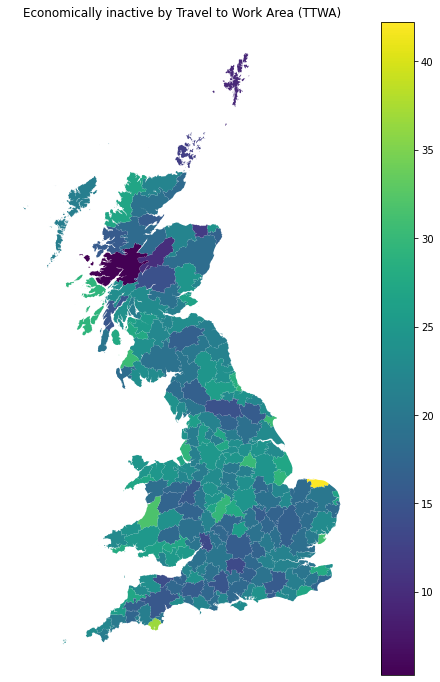

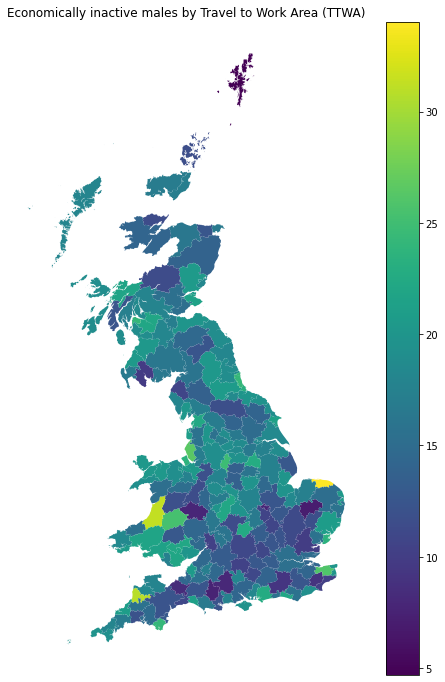

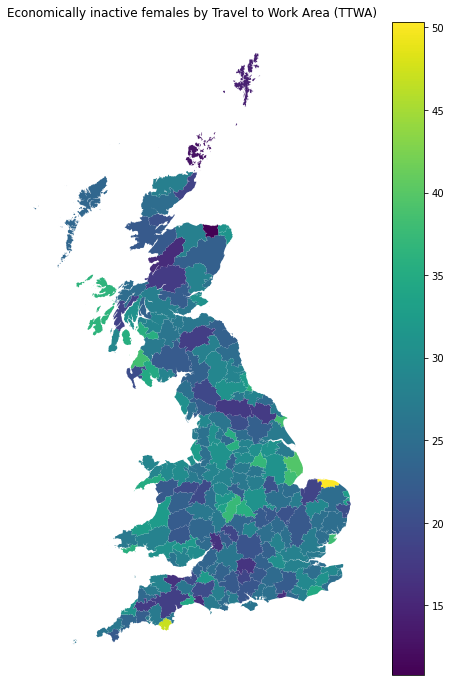

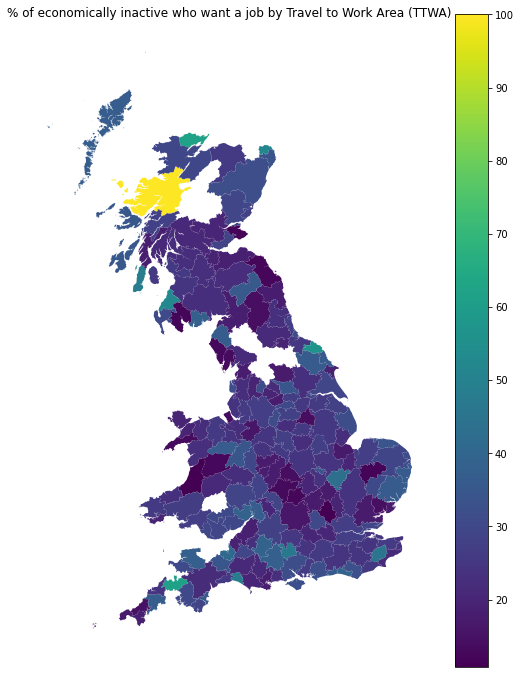

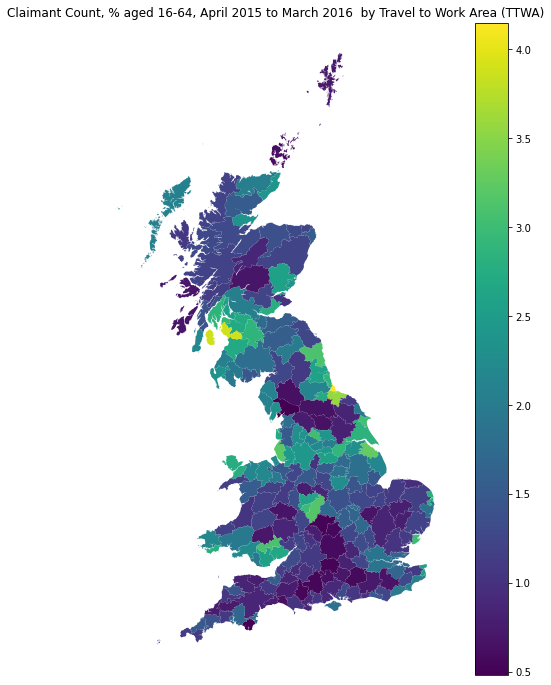

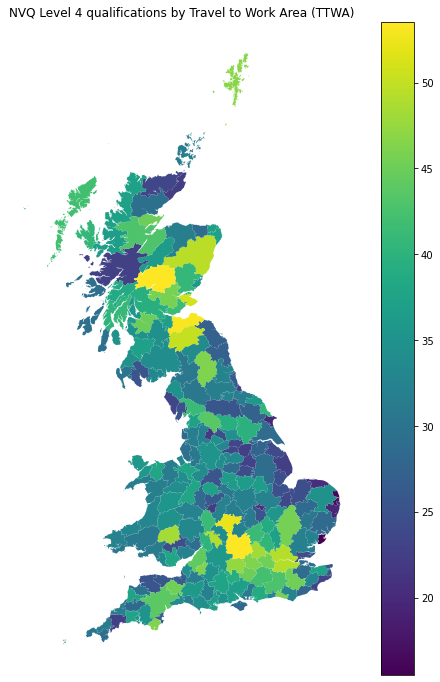

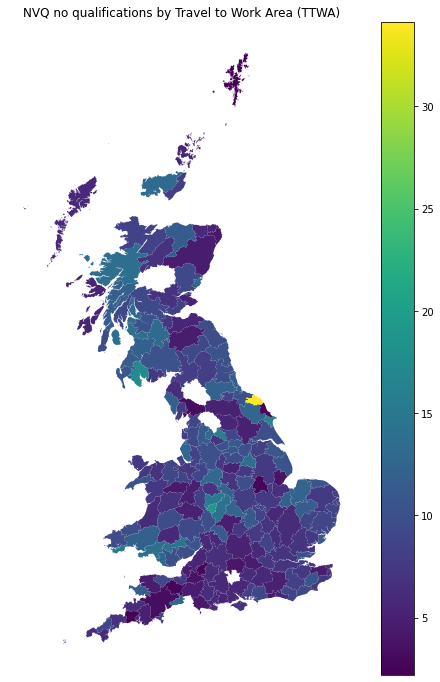

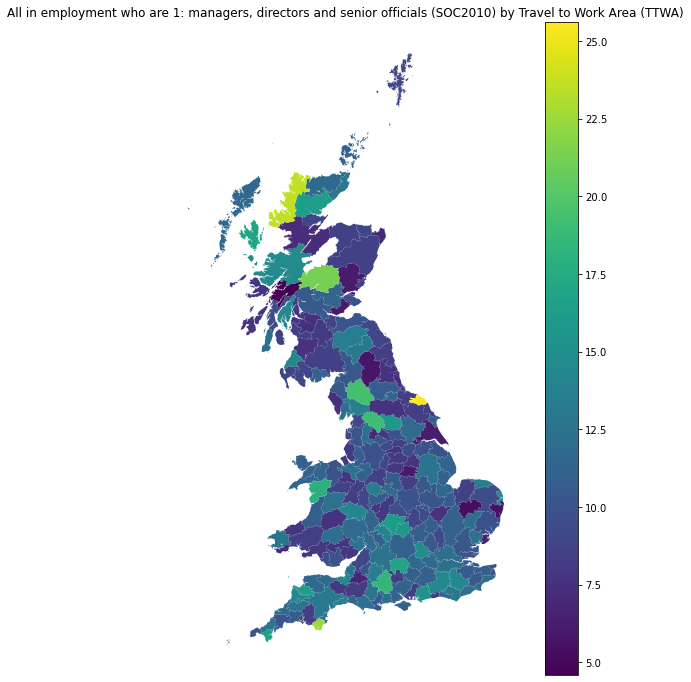

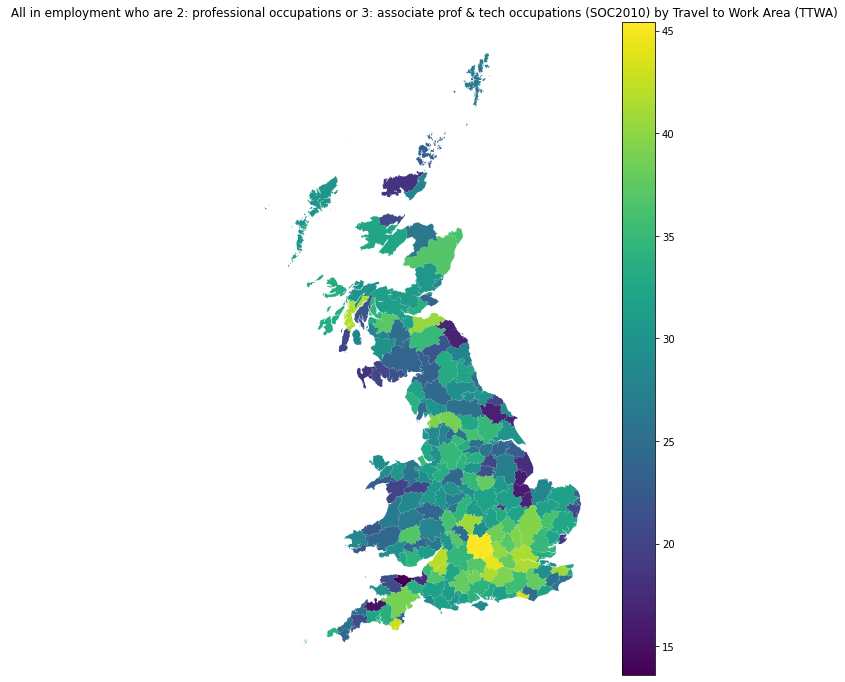

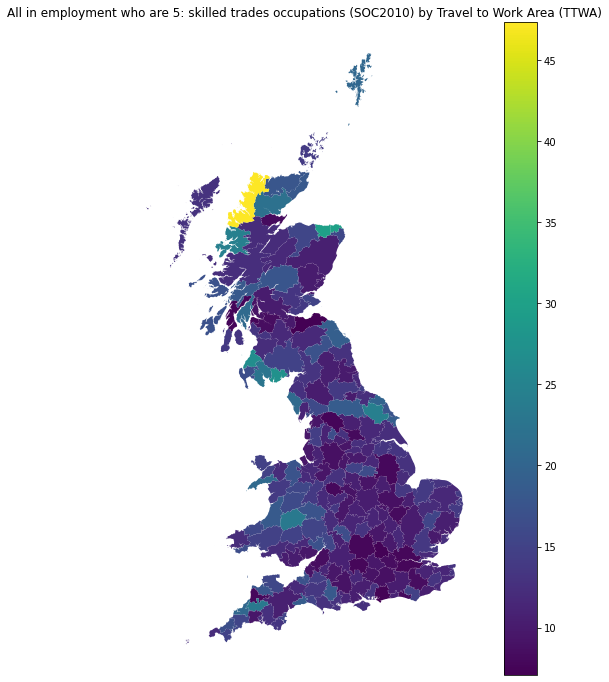

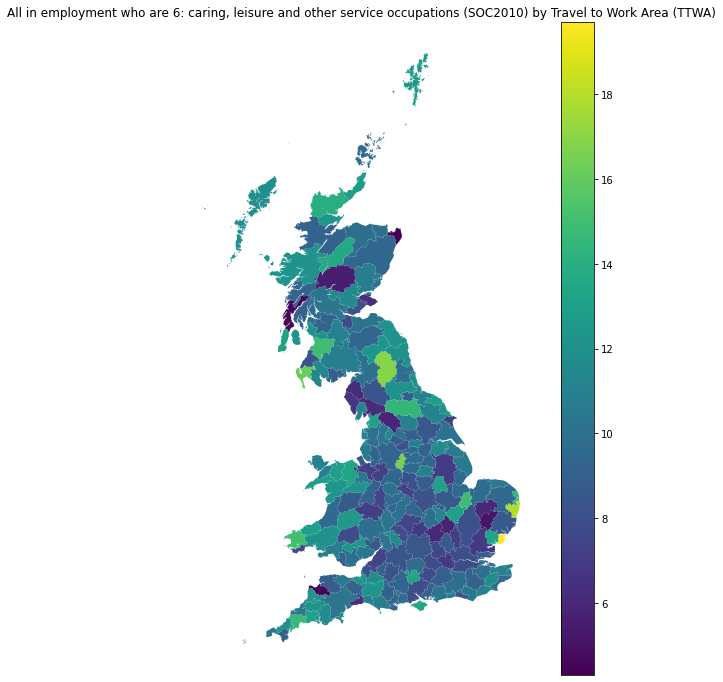

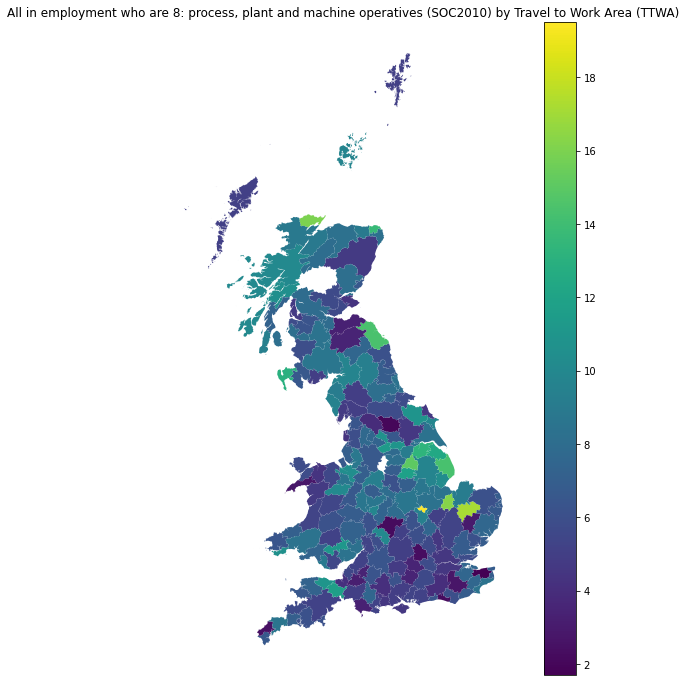

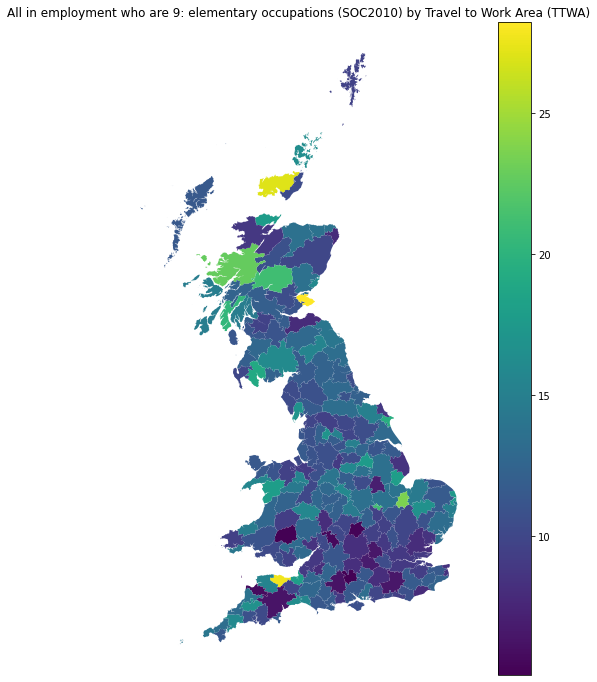

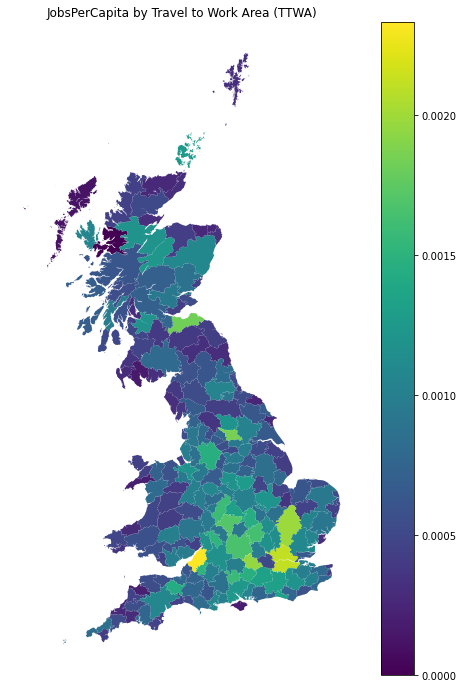

In [307]:
# For interesting columns
for col in UK_TTWA_map.columns[11:]:
    UK_TTWA_map[col] = pd.to_numeric(UK_TTWA_map[col], errors='coerce')

    col_dtype = UK_TTWA_map[col].dtype
    #print(f'{col} is of type {col_dtype}')

    # Make fig and ax objects for plotting
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 12)
    ax.axis('off')
    ax.set_title(f'{col} by Travel to Work Area (TTWA)')

    # Draw map
    p = UK_TTWA_map.plot(ax = ax, cmap='viridis', column = col, legend = True) #norm=matplotlib.colors.LogNorm(vmin=min(UK_TTWA_map[col]), vmax=max(UK_TTWA_map[col]))

    # Export fig
    filename= re.sub('[^a-zA-Z]+', '', col)
    plt.savefig(f'fig_export/{filename}.png', bbox_inches='tight')


In [ ]:
for area in UK_TTWA_map.TTWA11NM:
    n_jobs = sum(job_df.TTWA_NAME == area)
    population = TTWA_data.loc[TTWA_data.TTWA11NMN == area,' Population'].values[0]
    print(f'\n{n_jobs} jobs in {area}')
    print(population)
    print(type(population))

In [216]:
TTWA_data = pd.read_excel('TTWA_data.xls', skiprows=1)

print(list(TTWA_data))

print(UK_TTWA_map.TTWA11NM)

['TTWA11CDN', 'TTWA11NMN', 'Region/Country', ' Population', 'Employment rate ', 'Male employment rate', 'Female employment rate', 'Self employment rate', 'Economically inactive', 'Economically inactive males', 'Economically inactive females', '% of economically inactive who want a job', 'Claimant Count, % aged 16-64, April 2015 to March 2016 ', 'NVQ Level 4 qualifications', 'NVQ no qualifications', 'All in employment who are 1: managers, directors and senior officials (SOC2010)', ' All in employment who are 2: professional occupations or 3: associate prof & tech occupations (SOC2010)', 'All in employment who are 5: skilled trades occupations (SOC2010)', 'All in employment who are 6: caring, leisure and other service occupations (SOC2010)', 'All in employment who are 8: process, plant and machine operatives (SOC2010)', 'All in employment who are 9: elementary occupations (SOC2010)']
0                     Barnsley
1                     Bradford
2                      Halifax
3           

In [200]:
# Double check difference in TTWA names between dataset and shapefile!!!
df_list = pd.unique(job_df.TTWA_NAME)
df_list = np.delete(df_list, 0)
print(type(df_list))
sf_list = pd.unique(UK_TTWA_map.TTWA11NM)
print(type(sf_list))
print(np.setdiff1d(df_list, sf_list))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[]


In [110]:
# Read out geographical data
# CITY_NAME     NUTS1_NAME	NUTS3_NAME	TTWA_NAME	COUNTRY_NAME

geo_snip = job_df.loc[1:100,['CITY_NAME','NUTS1_NAME','NUTS3_NAME','TTWA_NAME','COUNTRY_NAME']]


# Iterate through data
for index, row in geo_snip.iterrows():
    city = row['CITY_NAME']
    country = row['COUNTRY_NAME']
    if city == '[Unknown City]':
        continue
    
    print(f'\nCity: {city}')
    #print(row)
    #geo_info = geocode(row, provider='nominatim', user_agent = 'varun', timeout = 5)
    #print(geo_info)




City: London, Hounslow and Richmond upon Thames

City: Hereford, Herefordshire, County of

City: Sheffield

City: Manchester

City: Cheltenham, Gloucestershire

City: Burton Upon Trent, Staffordshire CC

City: London, Bromley

City: London, Westminster

City: Manchester

City: Warrington

City: Manchester

City: London, Westminster

City: Wimborne, Dorset CC

City: Hull, Kingston upon Hull, City of

City: Redcar, South Teesside

City: London, Westminster

City: Hatfield, Hertfordshire

City: London, Bexley and Greenwich

City: Stoke-on-Trent

City: London, Westminster

City: Staines, West Surrey

City: Birmingham

City: Hull, Kingston upon Hull, City of

City: London, Westminster

City: Warwick, Warwickshire

City: Barry, Cardiff and Vale of Glamorgan

City: London, Westminster

City: Southampton

City: London, Westminster

City: Carlisle, East Cumbria

City: Didcot, Oxfordshire

City: Edinburgh, City of Edinburgh

City: London, Westminster

City: Bradford

City: Hull, Kingston upon H

In [137]:
# Get list of Travel to work areas (TTWAs) from dataset
TTWA_list = pd.unique(job_df.TTWA_NAME)
TTWA_list = np.delete(TTWA_list, 0)


for area in TTWA_list:
    num_jobs = sum(job_df.TTWA_NAME == area)
    print(f'{num_jobs} job postings in {area}')
    


17680 job postings in London
146 job postings in Hereford
808 job postings in Sheffield
3917 job postings in Manchester
276 job postings in Cheltenham
187 job postings in Burton upon Trent
695 job postings in Warrington and Wigan
222 job postings in Poole
336 job postings in Hull
263 job postings in Middlesbrough and Stockton
430 job postings in Stevenage and Welwyn Garden City
364 job postings in Stoke-on-Trent
850 job postings in Slough and Heathrow
2764 job postings in Birmingham
418 job postings in Leamington Spa
767 job postings in Cardiff
849 job postings in Southampton
81 job postings in Carlisle
931 job postings in Oxford
1249 job postings in Edinburgh
421 job postings in Bradford
1945 job postings in Bristol
617 job postings in Medway
853 job postings in Newcastle
462 job postings in Exeter
12 job postings in Llandrindod Wells and Builth Wells
449 job postings in Brighton
518 job postings in Dudley
14 job postings in Pembroke and Tenby
42 job postings in Spalding
129 job posti

In [103]:

print(100*(sum(job_df.NUTS1_NAME.isna()))/len(job_df.NUTS1_NAME))

print(100*(sum(job_df.NUTS3_NAME.isna()))/len(job_df.NUTS3_NAME))

print(100*(sum(job_df.TTWA_NAME.isna()))/len(job_df.TTWA_NAME))

print(100*(sum(job_df.COUNTRY_NAME.isna()))/len(job_df.COUNTRY_NAME))

print(100*(sum(job_df.CITY_NAME == '[Unknown City]'))/len(job_df.CITY_NAME))

25.94514603393627
25.94514603393627
25.94514603393627
25.94514603393627
25.817160112387636


In [53]:
print(geo_snip.CITY_NAME)

geo_info2 = geocode(geo_snip.CITY_NAME, provider='nominatim', user_agent = 'varun', timeout = 5)

print(geo_info2)

1     London, Hounslow and Richmond upon Thames
2                                [Unknown City]
3            Hereford, Herefordshire, County of
4                                     Sheffield
5                                    Manchester
6                   Cheltenham, Gloucestershire
7           Burton Upon Trent, Staffordshire CC
8                                [Unknown City]
9                               London, Bromley
10                          London, Westminster
11                                   Manchester
12                               [Unknown City]
13                                   Warrington
14                               [Unknown City]
15                                   Manchester
16                          London, Westminster
17                               [Unknown City]
18                               [Unknown City]
19                          Wimborne, Dorset CC
20                               [Unknown City]
21            Hull, Kingston upon Hull, 

In [49]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']